In [122]:
!python -V
!pip install spotpy
!pip install neupy

Python 3.6.5 :: Anaconda, Inc.
thinc 6.12.1 has requirement plac<1.0.0,>=0.9.6, but you'll have plac 1.0.0 which is incompatible.
tensorflow 1.13.2 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
tensorflow-gpu 1.12.0 has requirement tensorboard<1.13.0,>=1.12.0, but you'll have tensorboard 1.13.1 which is incompatible.
spacy 2.0.18 has requirement plac<1.0.0,>=0.9.6, but you'll have plac 1.0.0 which is incompatible.
pyro-ppl 0.3.0+45c04693 has requirement graphviz>=0.8, but you'll have graphviz 0.5.1 which is incompatible.
allennlp 0.7.2 has requirement torch<0.5.0,>=0.4.1, but you'll have torch 1.0.0 which is incompatible.
thinc 6.12.1 has requirement plac<1.0.0,>=0.9.6, but you'll have plac 1.0.0 which is incompatible.
tensorflow 1.13.2 has requirement numpy<2.0,>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
tensorflow-gpu 1.12.0 has requirement tensorboard<1.13.0,>=1.12.0, but you'll have tensorboard 1.13.1 which is incompatible

In [1]:
# The code was removed by Watson Studio for sharing.

Se muestran primeras filas de dataframes

In [129]:
# Se corrigen valores númericos "-" por 0

dfs = [df1_1,df1_2,df2,df3,df4]

for df in dfs:
    df.replace(" -   ",0,inplace=True)

In [130]:
#cambiar nombre de última columna

for df in dfs:
    df.rename(columns={df.columns[-1]:"Indicator"},inplace=True)

In [131]:
y=0
a=0
for df in dfs:
    
    a=df["DEPOSITOS"].sum()
    y+=a
print("Monto de depósitos: ",y)

Monto de depósitos:  0


In [132]:
# Seleccionar columnas predictoras

for df in dfs:
    df.drop(columns=["NOMBRE","MON","NITTRANSPORTADORA","SALDOINIDEPOSITARIO","DEPOSITOS"," RECOLECCIONES ",
                     " SALDOFINDEPOSITARI ","TIPOCAJERO","SALDOINICIAL","PROVISIONES"," ARQUEOS "," SALDOFINAL ",
                    "ESTADO","TRANSPORTADORA"],inplace=True)
    

In [133]:
#añadir columna de mes y año
i=0
for df in dfs:
    if i == 4:
        df["FECHA"]=pd.to_datetime(df["FECHA"],format="%d/%m/%y")
        df["Month"]=df["FECHA"].apply(lambda x:x.month)
        df["Year"]=df["FECHA"].apply(lambda x:x.year)
        df["month_day"]=df["FECHA"].apply(lambda x:x.day)
    else:
        df["FECHA"]=pd.to_datetime(df["FECHA"],format="%d/%m/%Y")
        df["Month"]=df["FECHA"].apply(lambda x:x.month)
        df["Year"]=df["FECHA"].apply(lambda x:x.year)
        df["month_day"]=df["FECHA"].apply(lambda x:x.day)
    i+=1

In [134]:
#juntando las tablas de atms

df_total = pd.concat(dfs,ignore_index=True)
df_total.drop(columns=["Indicator"],inplace=True,axis=1)
df_total.head()

,FECHA,IDATM,CENTROEFECTIVO,CONSUMO,Month,Year,month_day
0,2016-01-01,1,Bogota,0.0,1,2016,1
1,2016-01-02,1,Bogota,82820000.0,1,2016,2
2,2016-01-03,1,Bogota,67100000.0,1,2016,3
3,2016-01-04,1,Bogota,114030000.0,1,2016,4
4,2016-01-05,1,Bogota,81100000.0,1,2016,5


In [135]:
df_total=df_total[df_total.CONSUMO!=305000000000000.0]
df_total=df_total[df_total.CONSUMO!=110000000000000.0]
df_total.CONSUMO.nlargest()

540241    7.000794e+09
454963    4.159000e+09
188125    3.816174e+09
16230     3.645000e+09
15945     3.450416e+09
Name: CONSUMO, dtype: float64

## Start of Anova Month-Consumo

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log


F_onewayResult(statistic=1915.114960633866, pvalue=0.0)

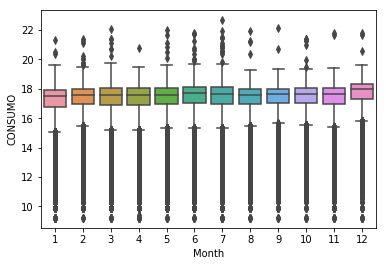

In [136]:
from scipy.stats import f_oneway
import numpy as np
import seaborn as sns

month_df = df_total[["Month","CONSUMO"]]


sns.boxplot(month_df["Month"],np.log(month_df["CONSUMO"]))

data_month={}
for i in month_df.Month.unique().tolist():
    data_month["month"+str(i)]=(month_df[month_df["Month"]==i]["CONSUMO"])


f_oneway(data_month["month1"],data_month["month2"],data_month["month3"],data_month["month4"],
         data_month["month5"],data_month["month6"],data_month["month7"],data_month["month8"],
        data_month["month9"],data_month["month10"],data_month["month11"],data_month["month12"])

## End of Anova Month-Consumo

In [137]:
df_total["Weekday"]=df_total["FECHA"].dt.dayofweek

In [138]:
#input working days and holidays

def holidays(df):
    
    #set holidays in lists
    
    holidays_fix = ["01/01/2016","01/05/2016","20/07/2016","07/08/2016","08/12/2016","25/12/2016","01/01/2017",
                    "01/05/2017","20/07/2017","07/08/2017","08/12/2017","25/12/2017","01/01/2018","01/05/2018",
                    "20/07/2018","07/08/2018","08/12/2018","25/12/2018","01/01/2019","01/05/2019","20/07/2019",
                    "07/08/2019"]
    holidays_mon = ["11/01/2016","21/03/2016","04/07/2016","15/08/2016","17/10/2016","07/11/2016","14/11/2016",
                   "09/01/2017","20/03/2017","03/07/2017","21/08/2017","16/10/2017","06/11/2017","13/11/2017",
                   "08/01/2018","19/03/2018","02/07/2018","20/08/2018","15/10/2018","05/11/2018","12/11/2017",
                   "07/01/2019","25/03/2019","01/07/2019","19/08/2019"]
    holidays_easter = ["20/03/2016","24/03/2016","25/03/2016","27/03/2016","09/05/2016","30/05/2016","06/06/2016",
                      "06/04/2017","13/04/2017","14/04/2017","16/03/2017","29/05/2017","19/06/2017","26/06/2017",
                      "25/03/2018","29/03/2018","30/03/2018","01/04/2018","14/05/2018","04/06/2018","11/06/2018",
                      "14/04/2019","18/04/2019","19/04/2019","21/04/2019","03/06/2019","24/06/2019","01/07/2019"]
    
    #converto to datetime
    
    
    holidays = holidays_fix+holidays_mon+holidays_easter
    
    holidays_fix=pd.to_datetime(holidays_fix,dayfirst=True) 
    holidays_mon=pd.to_datetime(holidays_mon)
    holidays_easter=pd.to_datetime(holidays_easter)
    holidays=pd.to_datetime(holidays)
    
    # set working days and holiday types for each day
    
    df["Working_day"]=np.where((df["Weekday"]==5) | (df["Weekday"]==6) ,"H",np.where(df["FECHA"].isin(holidays),"H","W"))
    
        
    df["Holiday_type"]=np.where(df["FECHA"].isin(holidays_fix),"HF",np.where(df["FECHA"].isin(holidays_mon),"HM",
                        np.where(df["FECHA"].isin(holidays_easter),"HE","W")))
    
    #set holidays sequence
    
    df["bin1"]=0
    df["bin2"]=0
    df["bin3"]=0
    
    df["bin1"]=df["Working_day"].shift(1)
    df["bin2"]=df["Working_day"]
    df["bin3"]=df["Working_day"].shift(-1)
    
    df["bin1"].fillna("W",inplace=True)
    df["bin3"].fillna("W",inplace=True)
    
    df["holiday_seq"]=df["bin1"].astype(str)+df["bin2"].astype(str)+df["bin3"].astype(str)
    
    df.drop(columns=["bin1","bin2","bin3"],axis=1,inplace=True)
    
    #set father's day for colombia
    df["fathers_day"]=np.where(df["FECHA"]==pd.to_datetime("16/06/2019"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("19/06/2016"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("18/06/2017"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("17/06/2018"),1,0))))
    #set mother's day
    df["mothers_day"]=np.where(df["FECHA"]==pd.to_datetime("08/05/2016"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("14/05/2017"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("13/05/2018"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("12/05/2019"),1,0))))
    #set valentine's day
    df["mothers_day"]=np.where(df["FECHA"]==pd.to_datetime("17/09/2016"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("16/09/2017"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("15/09/2018"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("21/09/2019"),1,0))))
    #set children's day
    df["child_day"]=np.where(df["FECHA"]==pd.to_datetime("30/04/2016"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("29/04/2017"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("28/04/2018"),1,np.where(df["FECHA"]==
                                            pd.to_datetime("27/04/2019"),1,0))))
    
    #set first day of month
    df["first_day_m"]=np.where(df["month_day"]==1,1,0)
    
    #set pay day of month
    df["pay_day"]=np.where(df["month_day"]==15,1,np.where(df["month_day"]==30,1,0))
    
    #set season (it is averaged for whole months) summer=1
    df["season"]=np.where(df["Month"]==7,1,np.where(df["Month"]==8,1,np.where(df["Month"]==9,1,np.where(df["Month"]==10,
                            2,np.where(df["Month"]==11,2,np.where(df["Month"]==12,2,np.where(df["Month"]==1,3,
                            np.where(df["Month"]==2,3,np.where(df["Month"]==3,3,np.where(df["Month"]==4,4,
                         np.where(df["Month"]==5,4,np.where(df["Month"]==6,4,0))))))))))))
                                  
    #set week of month
    df["week_m"]=df["month_day"].apply(lambda x:x//7)
    
    #set vacations
    df["vacations"]=np.where((df["month_day"]>14) & (df["Month"]==6),1,np.where(df["Month"]==7,1,
                            np.where((df["month_day"]<16)&(df["Month"]==8),1,np.where((df["month_day"]>14)
                            &(df["Month"]==11),1,np.where(df["Month"]==12,1,np.where((df["month_day"]<16)
                            &(df["Month"]==1),1,0))))))
                                  
    #set transaction of 3,2,1 days earlier
    df["tx_3day"]=df["CONSUMO"].shift(3)
    df["tx_2day"]=df["CONSUMO"].shift(2)
    df["tx_1day"]=df["CONSUMO"].shift(1)
    
    df["tx_3day"].fillna(0,inplace=True)
    df["tx_2day"].fillna(0,inplace=True)
    df["tx_1day"].fillna(0,inplace=True)
    
    #set aguinaldo (prima)
    df["prima"]=np.where((df["month_day"]==30)&(df["Month"]==6),1,np.where((df["month_day"]==20)&(df["Month"]==12),1,0))

    return df

In [139]:
##### VERSION FINAL CAMBIAR DF POR SOLO DF_TOTAL ######

df_prueba=df_total.sort_values(['IDATM', 'FECHA'], ascending=[True, True])
df_comp=holidays(df_prueba)

#######################################################

In [140]:
del df_total
pd.set_option('display.max_columns', 50)
df_comp.head()

,FECHA,IDATM,CENTROEFECTIVO,CONSUMO,Month,Year,month_day,Weekday,Working_day,Holiday_type,holiday_seq,fathers_day,mothers_day,child_day,first_day_m,pay_day,season,week_m,vacations,tx_3day,tx_2day,tx_1day,prima
0,2016-01-01,1,Bogota,0.0,1,2016,1,4,H,HF,WHH,0,0,0,1,0,3,0,1,0.0,0.0,0.0,0
1,2016-01-02,1,Bogota,82820000.0,1,2016,2,5,H,W,HHH,0,0,0,0,0,3,0,1,0.0,0.0,0.0,0
2,2016-01-03,1,Bogota,67100000.0,1,2016,3,6,H,W,HHW,0,0,0,0,0,3,0,1,0.0,0.0,82820000.0,0
3,2016-01-04,1,Bogota,114030000.0,1,2016,4,0,W,W,HWH,0,0,0,0,0,3,0,1,0.0,82820000.0,67100000.0,0
4,2016-01-05,1,Bogota,81100000.0,1,2016,5,1,H,W,WHW,0,0,0,0,0,3,0,1,82820000.0,67100000.0,114030000.0,0


In [141]:
df_comp.dtypes

FECHA             datetime64[ns]
IDATM                      int64
CENTROEFECTIVO            object
CONSUMO                  float64
Month                      int64
Year                       int64
month_day                  int64
Weekday                    int64
Working_day               object
Holiday_type              object
holiday_seq               object
fathers_day                int64
mothers_day                int64
child_day                  int64
first_day_m                int64
pay_day                    int64
season                     int64
week_m                     int64
vacations                  int64
tx_3day                  float64
tx_2day                  float64
tx_1day                  float64
prima                      int64
dtype: object

In [142]:
df_comp.isna().any().any()

False

### Descriptive Statistics

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


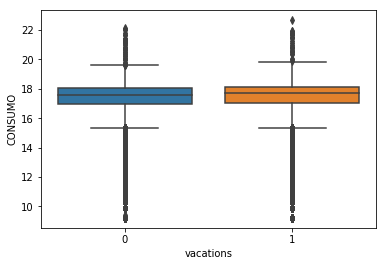

In [143]:
sns.boxplot(df_comp.vacations,np.log(df_comp.CONSUMO))

In [144]:
data_df = df_comp[["vacations","CONSUMO"]]

data_={}
for i in data_df.vacations.unique().tolist():
    data_["vacations"+str(i)]=(data_df[data_df["vacations"]==i]["CONSUMO"])


f_oneway(data_["vacations0"],data_["vacations1"])

F_onewayResult(statistic=4694.389865407294, pvalue=0.0)

Text(0.5,1,'Correlation Heatmap')

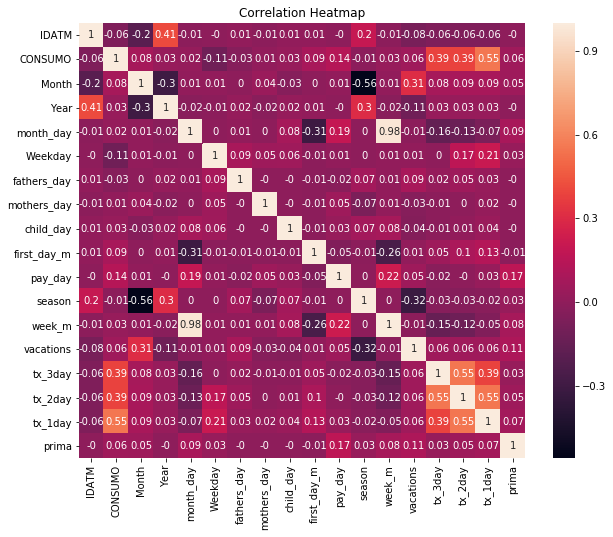

In [145]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,8))
sns.heatmap(round(df_comp.corr(),2),annot=True)
plt.title("Correlation Heatmap")

In [146]:
df_comp["Weekday"]=df_comp["Weekday"].astype(str)

### Preparar dataframe para modelar

In [147]:

# Eliminar columna CENTROEFECTIVO, FECHA; ONE-Hot encode; normalizar y agrupar dataframes por IDATM


df_comp.drop(columns=["FECHA","CENTROEFECTIVO"],inplace=True)
df_comp=pd.get_dummies(df_comp,drop_first=True,prefix=["WeekDay","WD","H_type","H_seq"])
df_comp.reset_index(inplace=True,drop=True)

#normalizar
df_comp["month_day"]=(df_comp["month_day"]-np.mean(df_comp["month_day"]))/np.std(df_comp["month_day"])
df_comp["Month"]=(df_comp["Month"]-np.mean(df_comp["Month"]))/np.std(df_comp["Month"])
df_comp["Year"]=(df_comp["Year"]-np.mean(df_comp["Year"]))/np.std(df_comp["Year"])
df_comp["season"]=(df_comp["season"]-np.mean(df_comp["season"]))/np.std(df_comp["season"])
df_comp["week_m"]=(df_comp["week_m"]-np.mean(df_comp["week_m"]))/np.std(df_comp["week_m"])
#df_comp["tx_3day"]=(df_comp["tx_3day"]-np.mean(df_comp["tx_3day"]))/np.std(df_comp["tx_3day"])
#df_comp["tx_2day"]=(df_comp["tx_2day"]-np.mean(df_comp["tx_2day"]))/np.std(df_comp["tx_2day"])
#df_comp["tx_1day"]=(df_comp["tx_1day"]-np.mean(df_comp["tx_1day"]))/np.std(df_comp["tx_1day"])

In [148]:
norm = ["tx_3day","tx_2day","tx_1day"]

In [149]:


# crea dataframes por cada cajero ATM

data={}

####### PARAMETRO n: NÚMERO DE ATMs A EVALUAR ###########
n = 10
##################### IMPORTANTE #######################

for i in df_comp.IDATM.unique().tolist()[:n]:
    data[str(i)]=df_comp[df_comp["IDATM"]==i]
    data[str(i)].drop(columns=["IDATM"],inplace=True,axis=1)
    data[str(i)].reset_index(inplace=True,drop=True)
    
    mean=data[str(i)][norm].mean(axis=0)
    std=data[str(i)][norm].std(axis=0)
    data[str(i)][norm]=(data[str(i)][norm].subtract(pd.Series(mean.values.tolist(),index=["tx_3day","tx_2day","tx_1day"]),axis=1)).divide(pd.Series(std.values.tolist(),index=["tx_3day","tx_2day","tx_1day"]),axis=1)
    
#del df_comp

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


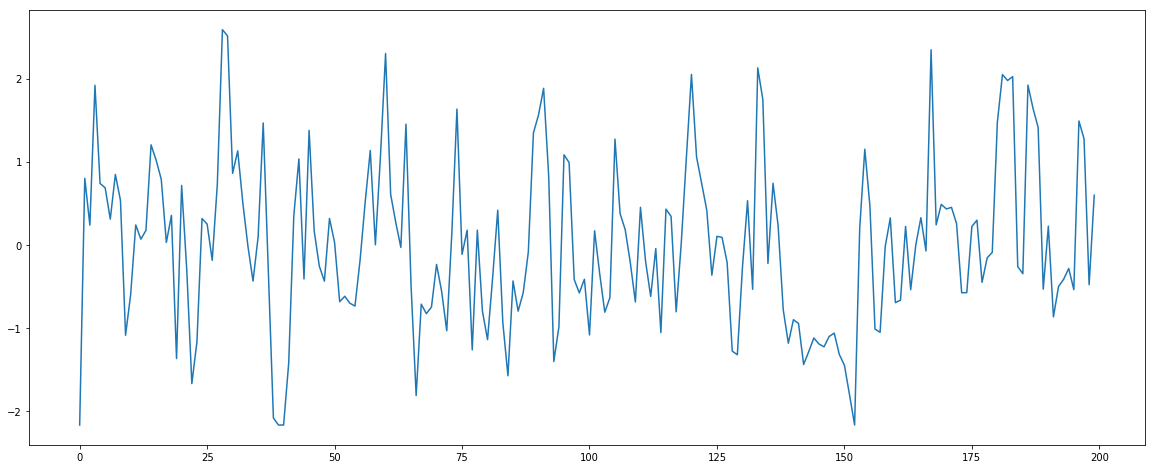

In [150]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot((data["1"]["CONSUMO"][:200]-np.mean(data["1"]["CONSUMO"][:200]))/np.std(data["1"]["CONSUMO"][:200]))

### Training and Modelling

Se empieza modelando para un solo ATM. Luego se podrá expandir a las demás ATMs

In [151]:
#Variable IDATM para entrenamiento
a = '725'

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


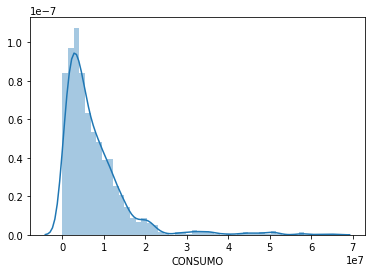

In [152]:

sns.distplot(data[a]["CONSUMO"])

In [155]:
###### PRUEBA: ELIMINAR 0 #######
#data_obj=data["1"][data["1"]["CONSUMO"]!=0]
#################################

from sklearn.model_selection import train_test_split

y=data[a]["CONSUMO"]
X=data[a].drop(columns=["CONSUMO"])

#Need to regularize the indep. var to scale it for regression
y_mean = np.mean(y)
y_std = np.std(y)
y = (y-y_mean)/y_std

In [156]:
#train model on Keras LSTM: only using CONSUMO as feature for the past n days

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Bidirectional
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error

def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


def ANN_data_gen(X,y,n_forecast):
    label=[]
    
    for i in range(0,len(y)-n_forecast):
        label.extend(y[i:i+n_forecast])
    
    feature_set=X.iloc[0:len(y)-n_forecast,:]
    feature_set=np.array(feature_set)
    
    label=np.array(label)
    label=np.reshape(label,(len(y)-n_forecast,n_forecast))
    return feature_set,label


def LSTMsingle_data_gen(n,y,n_forecast):

    feature_set =[]
    label=[]

    for i in range(n,len(y)-n_forecast):
        feature_set.append(y[i-n:i])
        label.extend(y[i:i+n_forecast])
    
    feature_set,label=np.array(feature_set),np.array(label)
    feature_set=np.reshape(feature_set,(feature_set.shape[0],feature_set.shape[1],1))
    
    label=np.reshape(label,(feature_set.shape[0],n_forecast))
    return feature_set, label

def LSTMmult_data_gen(X,n,y,n_forecast):
    X=X[["pay_day","WeekDay_1","WeekDay_2","WeekDay_3","WeekDay_4","WeekDay_5","WeekDay_6","WD_W"]].values
    
    feature_set =[]
    label = []
    
    for i in range(n,len(y)-n_forecast):
        feature_set.append(X[i-n:i,:])
        label.append(y[i:i+n_forecast])
    
    feature_set,label=np.array(feature_set),np.array(label)
    feature_set=np.reshape(feature_set,(feature_set.shape[0],feature_set.shape[1],feature_set.shape[2]))
    label=np.reshape(label,(feature_set.shape[0],n_forecast))
    return feature_set,label

def LSTM_training(X,y,n,n_forecast,type_nn="single",cross_val=False):
    LSTM_model = Sequential()
    dim=0
    if type_nn == "single":
        dim=1
        feature_set,label=LSTMsingle_data_gen(n,y,n_forecast)
    elif type_nn=="mult":
        
        feature_set,label=LSTMmult_data_gen(X,n,y,n_forecast)
        dim=feature_set.shape[2]
    else:
        print("Tipo de LSTM incorrecto. Elegir uno de los dos tipos siguientes: \'single\', \'mult\'")
        return 0
    
    
    
    LSTM_model.add(LSTM(units=52,return_sequences=False,  input_shape=(feature_set.shape[1], dim)))
    LSTM_model.add(Dropout(0.4))
    
    #LSTM_model.add(LSTM(units=8, return_sequences=False))
    #LSTM_model.add(Dropout(0.2))
    
    LSTM_model.add(Dense(units = n_forecast))
    
    LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=[r2_keras])
    
    if cross_val == False:
    
        feature_train,feature_test,label_train,label_test=train_test_split(feature_set,label,test_size=0.1,random_state=42)   
        history_LSTM=LSTM_model.fit(feature_train, label_train, epochs = 60, batch_size = 32,validation_split=0.15)
        y_pred=LSTM_model.predict(feature_test)
    else:
        

        skf = KFold(6,True,42)
        n = skf.get_n_splits(feature_set,label)
        history_LSTM=[]
        y_pred=[]
        label_test=[]
        i=1
        for train_index, test_index in skf.split(feature_set,label):
            
            feature_train, feature_test = feature_set[train_index],feature_set[test_index]
            label_train, label_test_ = label[train_index],label[test_index]
            label_test.append(label_test_)
            print("Starting Kfold %i out of %i"%(i,n))
            history_LSTM.append(LSTM_model.fit(feature_train, label_train, epochs = 60, batch_size = 32,validation_split=0.15,verbose=0))
            y_pred.append(LSTM_model.predict(feature_test))
            i+=1
        
    return history_LSTM,LSTM_model,label_test,y_pred


    

def ANN_training(X,y,n_forecast,next_day=False,cross_val=False):
    
    
    if next_day == True:        
        y=y.iloc[1:]
        X=X.iloc[:-1,:]
    
    
    
    regressor = Sequential()

    #input layer and hidden layer 1
    regressor.add(Dense(output_dim=16,init='uniform',activation='tanh',input_dim=32))
    regressor.add(Dropout(0.4))

    #hidden layer 2
    regressor.add(Dense(output_dim=8,init='uniform',activation='tanh'))
    regressor.add(Dropout(0.2))

    #hidden layer 3
    #regressor.add(Dense(output_dim=8,init='uniform',activation='tanh'))
    #regressor.add(Dropout(0.4))

    #output layer
    regressor.add(Dense(output_dim=n_forecast))

    regressor.compile(optimizer="adam",loss="mse",metrics=[r2_keras])
    
    X,y = ANN_data_gen(X,y,n_forecast)
    
    if cross_val == False:
    
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
        history_ANN=regressor.fit(X_train,y_train,validation_split=0.15,batch_size=32,epochs=50)
        y_pred=regressor.predict(X_test)
    else:
        skf = KFold(6,True,42)
        n = skf.get_n_splits(X,y)
        history_ANN=[]
        y_pred=[]
        y_test=[]
        i=1
        #X=X.values
        
        for train_index, test_index in skf.split(X,y):
            
            X_train, X_test = X[train_index],X[test_index]
            y_train, y_test_ = y[train_index],y[test_index]
            
            y_test.append(y_test_)
            print("Starting Kfold %i out of %i"%(i,n))
            history_ANN.append(regressor.fit(X_train, y_train, epochs = 50, batch_size = 32,validation_split=0.15,verbose=0))
            #y_pred.append(prediction(regressor,X_test,n_forecast))
            
            y_pred.append(regressor.predict(X_test))
            i+=1
    
    return history_ANN,regressor,y_test,y_pred

In [157]:
next_day=False
history_ann,regressor_ann,y_test_ann,y_pred_ann=ANN_training(X,y,20,next_day,cross_val=True)


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:129: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", input_dim=32, units=16, kernel_initializer="uniform")`
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:133: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=8, kernel_initializer="uniform")`
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:141: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=20)`


Starting Kfold 1 out of 6
Starting Kfold 2 out of 6
Starting Kfold 3 out of 6
Starting Kfold 4 out of 6
Starting Kfold 5 out of 6
Starting Kfold 6 out of 6


In [158]:
import time
start=time.time()
history_lstm,regressor_lstm,y_test_lstm,y_pred_lstm=LSTM_training(X,y,25,n_forecast=20,type_nn="single",cross_val=True)
end=time.time()

Starting Kfold 1 out of 6
Starting Kfold 2 out of 6
Starting Kfold 3 out of 6
Starting Kfold 4 out of 6
Starting Kfold 5 out of 6
Starting Kfold 6 out of 6


In [159]:
print("Time taken to train LSTM: ",end-start)

Time taken to train LSTM:  331.6181356906891


In [160]:
######### USE FOR KFOLD TRAINING ########
#########################################

r2_scores=[]
mse_scores =[]
for pred,test in zip(y_pred_ann,y_test_ann):
    r2_scores.append(r2_score(test,pred))
    mse_scores.append(mean_squared_error(test,pred))
print("Mean R2 score for ANN: ",round(np.mean(r2_scores),4))
print("MSE score for ANN: ",round(np.mean(mse_scores),4))



r2_scores=[]
mse_scores =[]
for pred,test in zip(y_pred_lstm,y_test_lstm):
    r2_scores.append(r2_score(test,pred))
    mse_scores.append(mean_squared_error(test,pred))
print("Mean R2 score for LSTM: ",round(np.mean(r2_scores),4))
print("MSE score for LSTM: ",round(np.mean(mse_scores),4))

Mean R2 score for ANN:  0.327
MSE score for ANN:  0.6659
Mean R2 score for LSTM:  0.4801
MSE score for LSTM:  0.4954


In [161]:
from spotpy.objectivefunctions import agreementindex

def s_mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_pred)+np.abs(y_true))/2)) * 100

In [162]:
######### USE FOR KFOLD TRAINING ########
#########################################
smape_scores=[]
ai_scores =[]
for pred,test in zip(y_pred_ann,y_test_ann):
    smape_scores.append(s_mean_absolute_percentage_error(test,pred))
    ai_scores.append(agreementindex(test,pred))
print("Mean SMAPE for ANN: ",round(np.mean(smape_scores),4))
print("Agreement Index for ANN: ",round(np.mean(ai_scores),4))

smape_scores=[]
ai_scores =[]
for pred,test in zip(y_pred_lstm,y_test_lstm):
    smape_scores.append(s_mean_absolute_percentage_error(test,pred))
    ai_scores.append(agreementindex(test,pred))
print("Mean SMAPE for ANN: ",round(np.mean(smape_scores),4))
print("Agreement Index for ANN: ",round(np.mean(ai_scores),4))

Mean SMAPE for ANN:  24.4398
Agreement Index for ANN:  0.6351
Mean SMAPE for ANN:  23.6587
Agreement Index for ANN:  0.8021


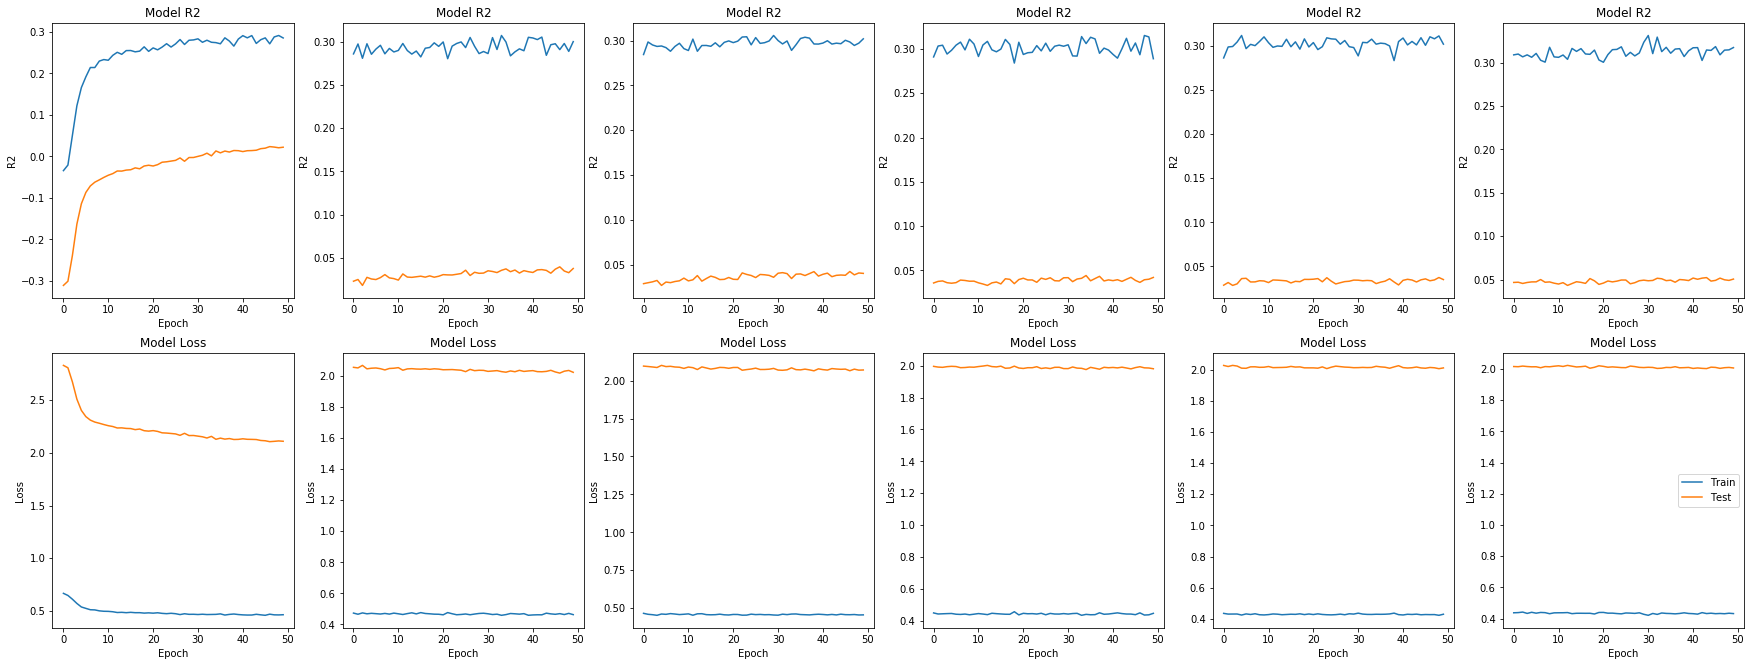

In [163]:
# ANN Training graph
fig=plt.figure(figsize=(20,7))
for i in range(6):
    ax=fig.add_subplot(2,6,i+1)
    
    ax.plot(history_ann[i].history['r2_keras'])
    ax.plot(history_ann[i].history['val_r2_keras'])
    ax.set_title('Model R2')
    ax.set_ylabel('R2')
    ax.set_xlabel('Epoch')

for i in range(6):

    ax1=fig.add_subplot(2,6,i+7)
    ax1.plot(history_ann[i].history['loss'])
    ax1.plot(history_ann[i].history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')

plt.subplots_adjust(bottom=0.1, right=1.3, top=1.3)    
plt.legend(['Train', 'Test'])

plt.show()

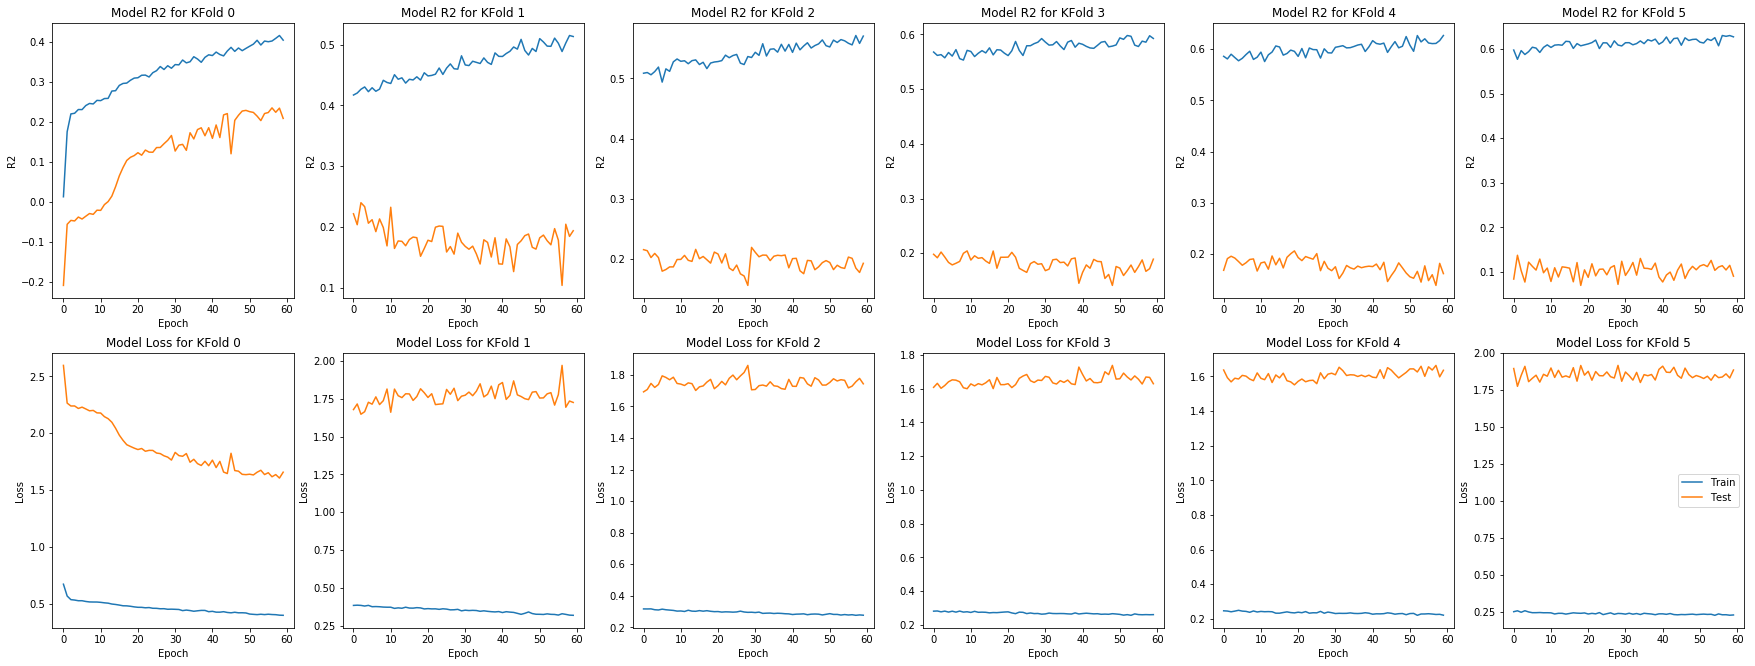

In [164]:
# LSTM Training graph
fig=plt.figure(figsize=(20,7))

for i in range(6):
    ax=fig.add_subplot(2,6,i+1)
    ax.plot(history_lstm[i].history['r2_keras'])
    ax.plot(history_lstm[i].history['val_r2_keras'])   
    ax.set_title('Model R2 for KFold '+str(i))
    ax.set_ylabel('R2')
    ax.set_xlabel('Epoch')

for i in range(6):
    ax1=fig.add_subplot(2,6,i+7)

    ax1.plot(history_lstm[i].history['loss'])
    ax1.plot(history_lstm[i].history['val_loss'])
    ax1.set_title('Model Loss for KFold '+str(i))
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    
plt.subplots_adjust(bottom=0.1, right=1.3, top=1.3)
plt.legend(['Train', 'Test'])
plt.show()

### Generalized Regression Neural Network

Used only as a baseline for performance

In [165]:


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from neupy.algorithms import GRNN as grnn
nn = grnn(std = 0.85, verbose = True)
nn.train(X_train, y_train)
preds = nn.predict(X_test)
print ("GRNN MSE: ",round(mean_squared_error(y_test, preds),4))
print("GRNN sMAPE: ",round(s_mean_absolute_percentage_error(y_test,preds),4))
print("GRNN Agreement Index: ",round(agreementindex(y_test,preds),4))


Main information

[ALGORITHM] GRNN

[OPTION] std = 0.85
[OPTION] verbose = True

GRNN MSE:  0.4961
GRNN sMAPE:  32.4471
GRNN Agreement Index:  0.2543


### ARIMA

### Check for Seasonality or Trend

Needed to transform data to stationary when using ARIMA

In [166]:
#test para estacionalidad

from statsmodels.tsa.stattools import adfuller
def stationary_test(y):
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return 0

In [167]:
stationary_test(y)

ADF Statistic: -1.562932
p-value: 0.502183
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


0

In [168]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

#### It was found that a differencing of 1 unit breaks down non-stationarity

In the next cells the differencing is evaluated with help from autocorrelation plots

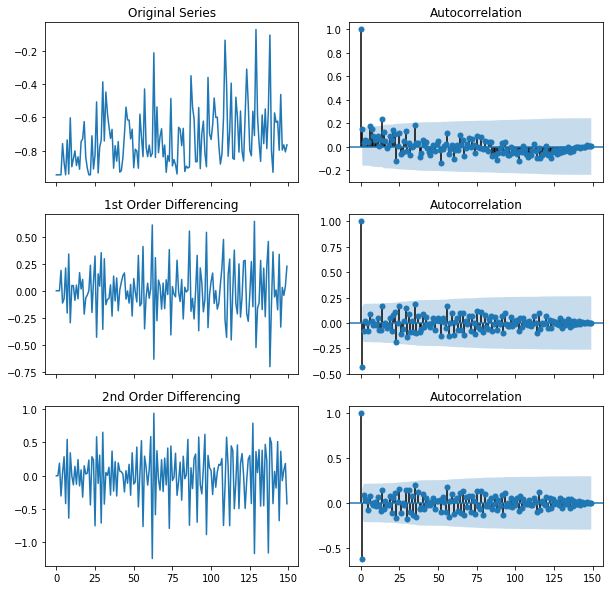

In [169]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y_stat_1=difference(y,1)
y_stat_2=difference(y_stat_1,1)

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True,figsize=(10,10))
axes[0, 0].plot(y.values[:150]); axes[0, 0].set_title('Original Series')
plot_acf(y.values[:150], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_stat_1[:150]); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_stat_1[:150], ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(y_stat_2[:150]); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_stat_2[:150], ax=axes[2, 1])

plt.show()

In [170]:
stationary_test(y_stat_1)

ADF Statistic: -11.474055
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


0

1 degree of differencing found and 1 MA term.

We continue with the plot of PACF to define AR terms is equal to 0.

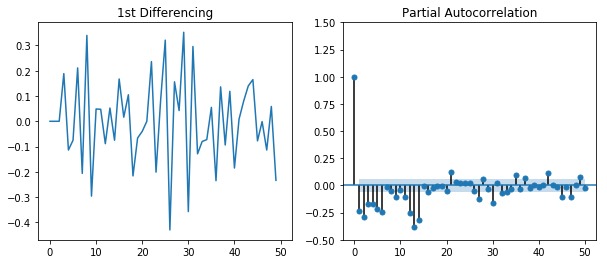

In [171]:
fig, axes = plt.subplots(1, 2, sharex=True,figsize=(10,4))
axes[0].plot(y_stat_1[:50]); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-0.5,1.5))
plot_pacf(y_stat_1, lags=50, ax=axes[1])

plt.show()


We test the ARIMA with the parameters found.

Number of test points: 20


/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/opt/conda/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

predicted=2.047439, expected=4.643010
predicted=2.906710, expected=-0.323727
predicted=0.347449, expected=0.477642
predicted=1.172372, expected=0.120646
predicted=0.663342, expected=0.765984
predicted=1.456625, expected=1.664716
predicted=1.966998, expected=1.481225
predicted=0.872273, expected=1.101760
predicted=0.966379, expected=-0.711929
predicted=-0.063142, expected=-0.466026
predicted=0.229231, expected=0.411485
predicted=0.659180, expected=0.840879
predicted=0.745835, expected=0.818410
predicted=0.671600, expected=2.991592
predicted=1.633587, expected=4.880176
predicted=2.828719, expected=1.372628
predicted=1.245557, expected=-0.201400
predicted=0.874806, expected=0.910780
predicted=1.331492, expected=0.471400
predicted=1.192972, expected=-0.623304
Test MSE: 2.293


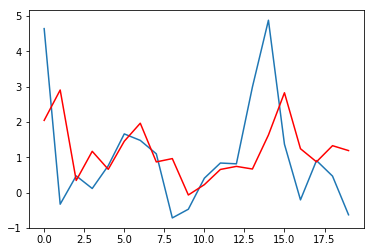

In [172]:
#slitting train and test sets for ARIMA
from statsmodels.tsa.arima_model import ARIMA


def inverse_difference(last_ob, value):
    return value + last_ob
# set split size
def evaluate_arima(y,arima_order,n_forecast):
    
    size=len(y)-n_forecast
    train_ar, test_ar = y[:size],y[size:len(y)]

    history = [x for x in train_ar]
    predictions = list()
    print("Number of test points: %i"%len(test_ar))
    for t in range(len(test_ar)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test_ar[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test_ar, predictions)
    print('Test MSE: %.3f' % error)
    
    return error,predictions,test_ar

error,predictions,test_ar=evaluate_arima(y.values,(5,1,0),20)

#inverted = [inverse_difference(y[i], predictions[i]) for i in range(len(predictions))]

# plot
plt.plot(test_ar)
plt.plot(predictions, color='red')
plt.show()
# invert the difference


In [173]:
print("sMAPE performace: %s"%round(s_mean_absolute_percentage_error(test_ar, predictions),4))
print("Agreement Index: %s"%round(agreementindex(test_ar,predictions),4))

sMAPE performace: 27.7503
Agreement Index: 0.3077


### Now we'll try deseasoning from 1 year

In [174]:
y_year=difference(y,365)
stationary_test(y_year)

ADF Statistic: -3.922530
p-value: 0.001875
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


0

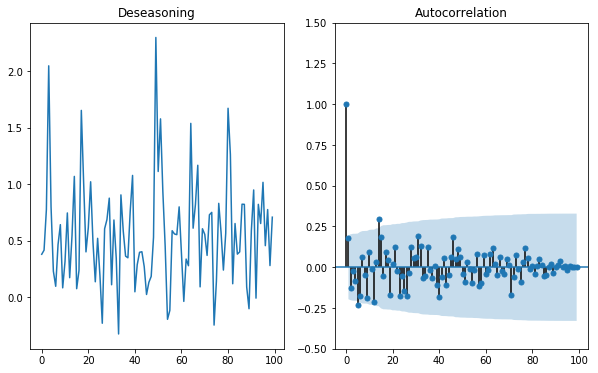

In [175]:
# 1st Differencing
fig, axes = plt.subplots(1, 2, sharex=True,figsize=(10,6))
axes[0].plot(y_year[:100]); axes[0].set_title('Deseasoning')
axes[1].set(ylim=(-0.5,1.5))
plot_acf(y_year[:100], ax=axes[1])

plt.show()

MA = 1

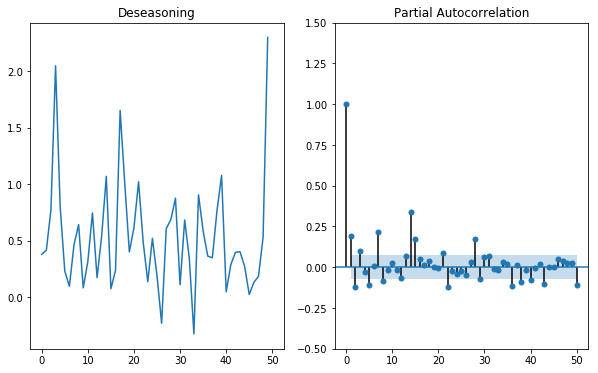

In [176]:
fig, axes = plt.subplots(1, 2, sharex=True,figsize=(10,6))
axes[0].plot(y_year[:50]); axes[0].set_title('Deseasoning')
axes[1].set(ylim=(-0.5,1.5))
plot_pacf(y_year,lags=50, ax=axes[1])

plt.show()

AR = 6

Number of test points: 20
predicted=1.109624, expected=1.375558
predicted=0.504520, expected=-1.980953
predicted=0.236948, expected=1.197060
predicted=1.205599, expected=0.644091
predicted=0.145000, expected=1.048520
predicted=0.896180, expected=1.792469
predicted=1.333544, expected=1.708837
predicted=0.764724, expected=1.243245
predicted=0.806466, expected=-0.833823
predicted=0.338129, expected=0.239662
predicted=0.733972, expected=0.969881
predicted=0.662744, expected=1.016065
predicted=0.773981, expected=0.252144
predicted=0.886505, expected=2.288019
predicted=1.220440, expected=3.098126
predicted=0.970143, expected=-1.818682
predicted=-0.051633, expected=-0.307066
predicted=1.084871, expected=1.209542
predicted=0.542542, expected=0.483068
predicted=0.330667, expected=-1.132151
Test MSE: 1.406


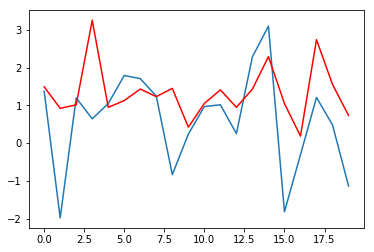

In [177]:
# set split size
error,predictions,test_ar=evaluate_arima(y_year,(6,0,1),20)
# invert the difference
inverted = [inverse_difference(y_year[i], predictions[i]) for i in range(len(predictions))]

# plot
plt.plot(test_ar)
plt.plot(inverted, color='red')
plt.show()

In [178]:
print("sMAPE performace: %s"%round(s_mean_absolute_percentage_error(test_ar, inverted),4))
print("Agreement Index: %s"%round(agreementindex(test_ar,inverted),4))

sMAPE performace: 24.2148
Agreement Index: 0.3722


Given the results, we observe that the LSTM is better in predicting ATM cash withdrawals (as tested in one random ATM) given its sMAPE and Agreement Index metrics.

_sMAPE and Agreement Index metrics were determined as proposed in several published papers regarding ATM prediction models._